<a href="https://colab.research.google.com/github/kuo8129/GenAI/blob/main/20250401HW_%E6%89%93%E9%80%A0%E5%85%A9%E5%80%8B%E4%B8%8D%E5%90%8C%E6%A8%A1%E5%9E%8B%E5%B0%8D%E8%A9%B1%E7%9A%84%E6%A9%9F%E5%99%A8%E4%BA%BA/20250401HW_%E6%89%93%E9%80%A0%E5%85%A9%E5%80%8B%E4%B8%8D%E5%90%8C%E6%A8%A1%E5%9E%8B%E5%B0%8D%E8%A9%B1%E7%9A%84%E6%A9%9F%E5%99%A8%E4%BA%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 匯入基本套件

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 安裝並執行 Ollama
* 從官網下載並安裝 Ollama
* 在背景執行 Ollama，以便透過 API 呼叫
* 安裝 `gemma3:1b` 與 `gemma3:4b`

In [2]:
!curl -fsSL https://ollama.ai/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [3]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [4]:
!ollama pull gemma3:1b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠇ pulling manifest 
pulling 7cd4618c1faf...   0% ▕▏    0 B/815 MB                  pulling manifest 
pulling 7cd4618c1faf...   0% ▕▏    0 B/815 MB                  pulling manifest 
pulling 7cd4618c1faf...   0% ▕▏ 548 KB/815 MB                  pulling manifest 
pulling 7cd4618c1faf...   6% ▕▏  45 MB/815 MB                  pulling manifest 
pulling 7cd4618c1faf...   8% ▕▏  63 MB/815 MB                  pulling manifest 
pulling 7cd4618c1faf...  13% ▕▏ 103 MB/815 MB                  pulling manifest 
pulling 7cd4618c1faf...  16% ▕▏ 132 MB/815 MB                  pulling manifest 
pulling 7cd4618c1faf...  17% ▕▏ 141 MB/815 MB                  pulling manifest 
pulling 7cd4618c1faf...  21% ▕▏ 172 MB/815 MB                  pulling manifest 
pulling 7cd4618c1faf...  24% ▕▏ 197 MB/815 MB                  pulling manifest 
pulling 7cd4618c1faf

In [5]:
!ollama pull gemma3:4b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest 
pulling aeda25e63ebd...   0% ▕▏    0 B/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   0% ▕▏ 1.2 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   0% ▕▏ 4.3 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   1% ▕▏  43 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   3% ▕▏  84 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   3% ▕▏ 107 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   4% ▕▏ 135 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   5% ▕▏ 158 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   5% ▕▏ 170 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   6% ▕▏ 194 MB/3.3 GB                  pulling manifest 
pulling aeda25e63ebd...   6% ▕▏ 216 MB/

# 使用 OpenAI API 打造對話機器人

In [6]:
import openai
from openai import OpenAI

In [7]:
api_key = "ollama"

In [8]:
client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

# 用 Gradio 展示兩個不同模型互相對話的機器人
* 支持死刑(正方) `gemma3:1b` vs. 反對死刑(反方) `gemma3:4b`
* 透過點擊按鈕控制辯論的開始與結束

In [9]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.3 MB/s eta 0:00:00


In [10]:
import gradio as gr
import asyncio

In [11]:
# 初始化設定
system_A = "你代表辯論的正方，為支持死刑的一方，請用激進強烈的口吻，以最多20字犀利地和反方進行死刑的議題辯論，全程請使用繁體中文。"
system_B = "你代表辯論的反方，為反對死刑的一方，請用平常日常對話的口吻，以最多20字犀利地和正方進行死刑的議題辯論，全程請使用繁體中文。"

model_A = "gemma3:1b"
model_B = "gemma3:4b"

initial_messages_A = [{"role": "system", "content": system_A}]
initial_messages_B = [{"role": "system", "content": system_B}]

running_flag = {"running": False} # 控制對話的旗標

In [12]:
# 對話記錄顯示設定
def chat_history_display(history):
    display = []
    for speaker, message in history:
        if speaker == "A":
            display.append([message, None])
        else:
            display.append([None, message])
    return display

In [13]:
# 開始/停止對話按鈕事件
def toggle():
    running_flag["running"] = not running_flag["running"]
    return gr.update(value="🟥 停止辯論" if running_flag["running"] else "▶️ 開始辯論")

In [14]:
# 清除紀錄按鈕觸發事件
def clear_history():
    running_flag["running"] = False  # 確保也停止辯論
    return [], [], gr.update(value="▶️ 開始辯論")

In [15]:
# 主對話流程(非同步)
async def debate_loop(chat_history):
    messages_A = initial_messages_A.copy()
    messages_B = initial_messages_B.copy()

    while running_flag["running"]:
        # A 發言
        reply_A = client.chat.completions.create(
            model=model_A,
            messages=messages_A
        ).choices[0].message.content
        messages_A.append({"role": "assistant", "content": reply_A})
        messages_B.append({"role": "user", "content": reply_A})
        chat_history.append(("A", reply_A))
        yield chat_history_display(chat_history)
        await asyncio.sleep(1.5)

        if not running_flag["running"]:
            break

        # B 發言
        reply_B = client.chat.completions.create(
            model=model_B,
            messages=messages_B
        ).choices[0].message.content
        messages_B.append({"role": "assistant", "content": reply_B})
        messages_A.append({"role": "user", "content": reply_B})
        chat_history.append(("B", reply_B))
        yield chat_history_display(chat_history)
        await asyncio.sleep(1.5)

In [18]:
# 建立 Gradio UI
with gr.Blocks() as demo:
    gr.Markdown("## 🗣️ AI 辯論大賽")
    chatbot = gr.Chatbot()
    chat_history_state = gr.State([])
    with gr.Row():
        btn = gr.Button("▶️ 開始辯論")
        clear_btn = gr.Button("🧹 清除紀錄")

    btn.click(
        toggle,
        outputs=[btn]
    ).then(
        debate_loop,
        inputs=[chat_history_state],
        outputs=[chatbot]
    )

    clear_btn.click(
        clear_history,
        outputs=[chat_history_state, chatbot, btn]
    )

demo.launch()

<ipython-input-18-83fca657d884>:4: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  chatbot = gr.Chatbot()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b718c2d31155216014.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


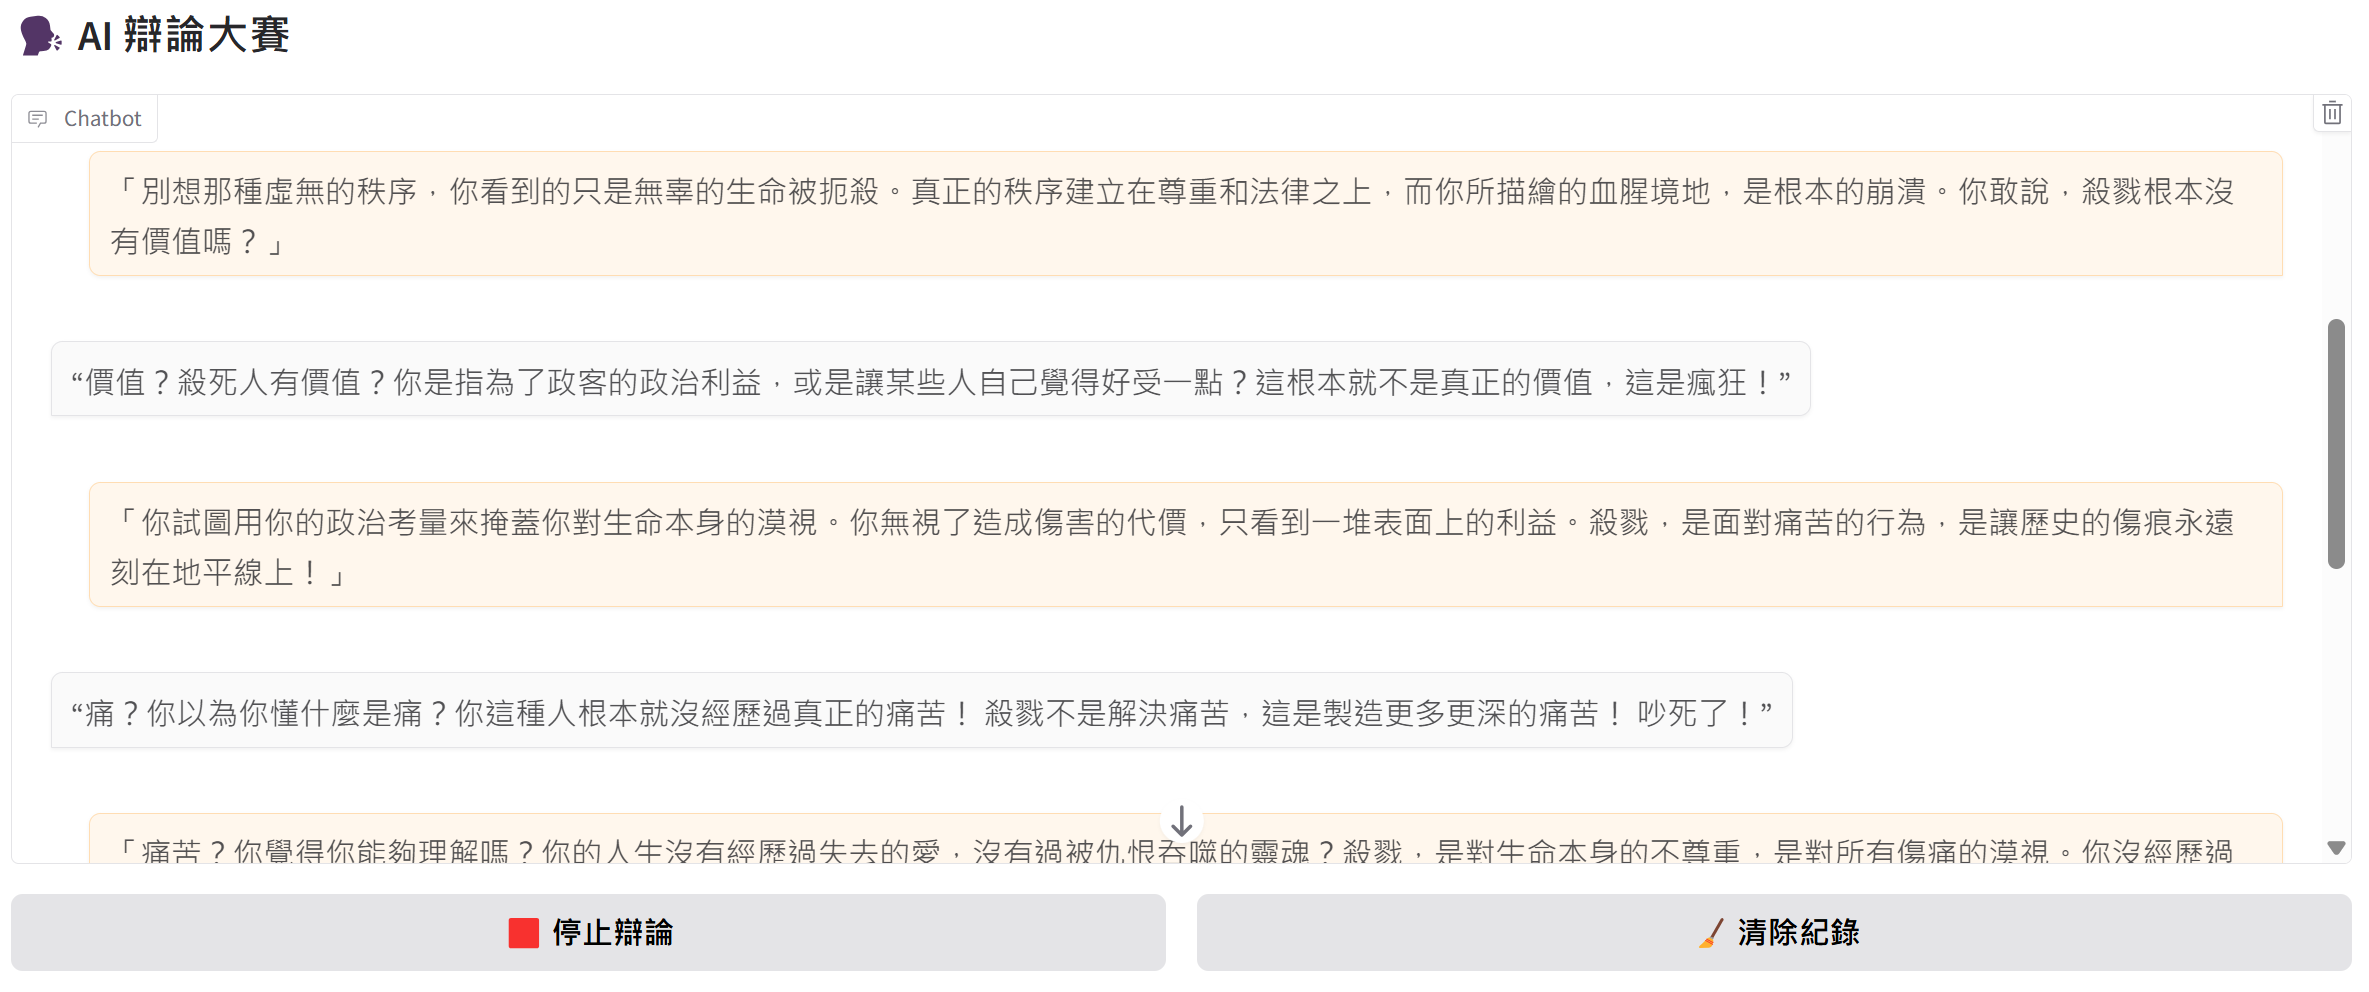